<a href="https://colab.research.google.com/github/thad75/TP-ENSEA-ELEVE/blob/main/3A/SIA/TP%202023%202024/TP1/Introduction_to_Pytorch_Lightning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install pytorch-lightning
!pip install torch-summary

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from pytorch_lightning import loggers as pl_loggers
import pytorch_lightning as pl
import matplotlib.pyplot as plt
import torchmetrics

<a href="https://imgflip.com/i/81780o"><img src="https://i.imgflip.com/81780o.jpg" title="made at imgflip.com"/></div>

# Pytorch-Lightning : Training made Easier

Time : 4 hours

In the Tutorial session, we used PyTorch to train different models for Binary Classification. In the tutorial, few things were done :


*   We created a Training/Testing Loop and trained our models
*   We created a Trainer Class to gather all loops to perform the Training/Testing.


As you have seen, writing the training and testing loop can be quickly indigest. One can get easily lost.

Let us introduce you Pytorch Lightning

<img src="https://pypi-camo.global.ssl.fastly.net/8bfd70b3d9aaf6804f26582374e201ecfff288fe/68747470733a2f2f706c2d7075626c69632d646174612e73332e616d617a6f6e6177732e636f6d2f6173736574735f6c696768746e696e672f7079746f7263682d6c696768746e696e672e706e67">


Pytorch lightning will handle a lot of things for you. It creates a Trainer which is a Code Management trick used by many companies (Meta, Google..) in order to get much more digest code.


More Information on : https://www.pytorchlightning.ai/

Goal of this lab :

* Use Pytorch Lightning for Training
* Learn to use Pytorch-Lightning
* Do classification on FashionMNIST, CIFAR-10


# I - Classify Numbers using Lightning

In this part, we will classify clothes.
We will use the Lightning framework for code management. What's interesting about Lightning is that you can plug in your Torch modules without any modification.

## a - LightningDataModule : FashionMNIST

As you have seen in the Tutorial, you need to create your Dataset Class.

As a reminder :    
 The Dataset class returns one sample of your dataset at a time. The main methods of the Dataset class are

*   __getitem__ : which fetched a sample at a given index
*   __len__ : which returns the len of the total dataset

The Dataset is loaded into a DataLoader. That Dataloader is then used to **fetch and send data as batches** for your Model.

You will see that using Lightning makes things clearer. LightningDataModule allows you to write cleaner Code and fit easily your data to your model.

You can always, use the basic Pytorch Dataloader in a separate code.

On the opposite of the Tutorial, the Dataset is already written by folks of Torchvision.
* Fill in the blanks

### Exploratory Data Analysis : Discovering the Data

First, when working on a task, we often explore the Data, to understand what it's about.
Perform Exploratory Data Analysis on the MNIST Dataset :    

1.   What type of Data do you have ? (Images, Texts, Sound..) <br>
    PIL Images in gray scale

2.   How many Data do you have ?<br>
    60000 training samples and 10000 testing samples

3.   What's in a sample (1 element of the Dataset)<br>
    Tuple:  (PIL Image, label (Int))

4.   Is the Dataset umbalanced ?<br>
    No.The dataset is balanced: same amount of samples for all classes 

5.   What's the shape of any input sample ?<br>
        Images of 28x28 pixel with just 1 channel



In [2]:
# Loading the Training Split of MNIST Dataset
dataset_train  = FashionMNIST('', train=True, download=True)
dataset_test = FashionMNIST('', train=False, download=True)

In [4]:
# TODO : What's the length of the train and test split ?
print("Length of the train split : ", len(dataset_train))
print("Length of the test split : ", len(dataset_test))

Length of the train split :  60000
Length of the test split :  10000


In [15]:
# TODO : Retrieve one sample of the Dataset.
sample = dataset_train[3]

# TODO : What is in a sample ? Print the sample to understand
print(sample)

(<PIL.Image.Image image mode=L size=28x28 at 0x7F6272880280>, 3)


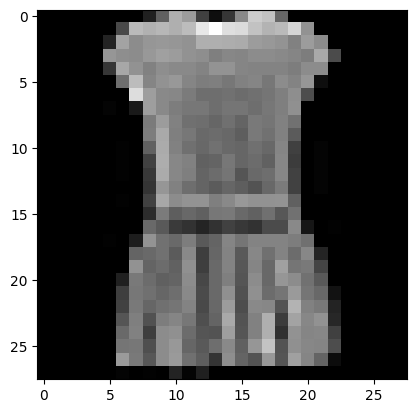

In [16]:
# TODO : Plot the image in the sample. Does it correspond to the second element of the sample ?

display(sample[0])

plt.imshow(sample[0], cmap='gray')

In [8]:
# TODO : What's the shape of the input image.
shape = sample[0].size
print(shape)

(28, 28)


0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: count, dtype: int64


Text(0, 0.5, 'Counts')

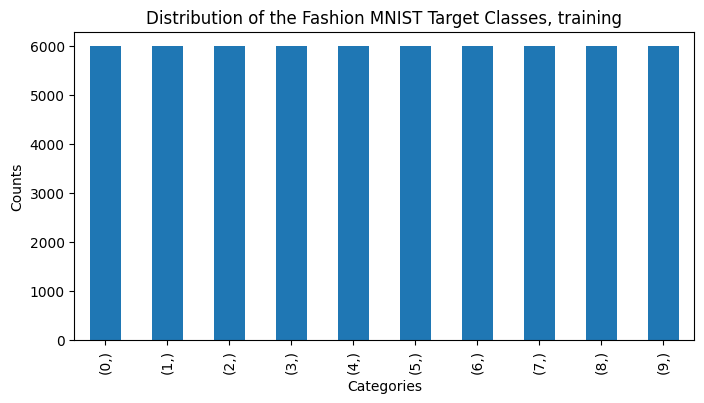

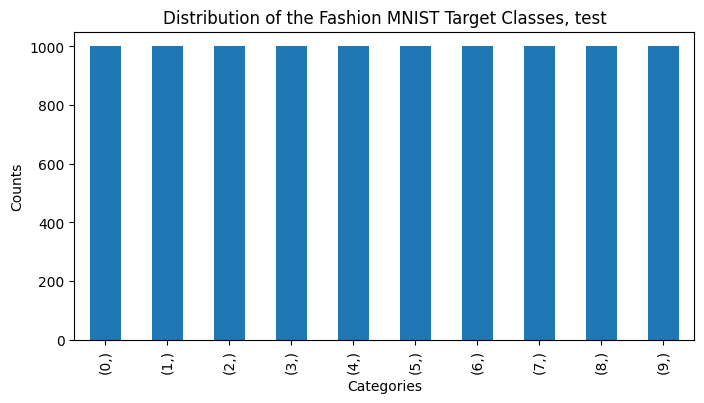

In [15]:
import pandas as pd

targets_trainig = pd.DataFrame(dataset_train.targets.numpy()) 
targets_test = pd.DataFrame(dataset_test.targets.numpy()) 

counts_train = targets_trainig.value_counts()
counts_test = targets_test.value_counts()

print(targets_trainig.value_counts())

plt.figure(figsize=(8, 4))
counts_train.plot(kind='bar')
plt.title("Distribution of the Fashion MNIST Target Classes, training")
plt.xlabel('Categories')
plt.ylabel('Counts')


print(targets_test.value_counts())
plt.figure(figsize=(8, 4))
counts_test.plot(kind='bar')
plt.title("Distribution of the Fashion MNIST Target Classes, test")
plt.xlabel('Categories')
plt.ylabel('Counts')



### Lightning DataModule : Dataset and DataLoader Embedded

In order to perform EDA, we downloaded already downloaded the Datasets.Now we will load everything into a LightningDataModule class.

Have a look at : https://pytorch.org/vision/stable/datasets.html

In [39]:
from torchvision.datasets.fakedata import FakeData
class FMNISTDataModule(pl.LightningDataModule):

    def __init__(self):
        super().__init__()
        self.transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
        self.data_dir = ''
        self.batch_size_train, self.batch_size_valid, self.batch_size_test = 32,32,32

    def prepare_data(self):
        # TODO : load the train and test dataset
        FashionMNIST(self.data_dir, train=True, download=True)
        FashionMNIST(self.data_dir, train=False, download=True)


    def setup(self, stage):
        #We need to setup our module. We have a training set that we will be fitting in our model
        #and a testing set used to test our models prediction.
        #the stage variable corresponds to those two steps :
        #         |fit
        # stage = <test
        #         |None

        #First stage is 'fit' (or None)
        if stage == "fit" or stage is None:
            # We create a validation split to watch the training.
            # TODO : Which dataset do we load for training ? 
            mnist_dataset = FashionMNIST(self.data_dir, train=False, transform=self.transform )
            train_size = int(0.8 * len(mnist_dataset))
            test_size = len(mnist_dataset) - train_size
            # TODO : Load the datasets as attributes of the Module. Don't forget you validation split
            self.mnist_train, self.mnist_valid =  torch.utils.data.random_split(mnist_dataset, [train_size, test_size])
            

        #Second stage is 'test'
        if stage == "test" or stage is None:

            self.mnist_test = FashionMNIST(self.data_dir, train=False, transform=self.transform)
            # Question : What additional set can we create ? Why ?
           #Answer: According to the documentation of the module it's possible to create prediction set for inference.
            

    def train_dataloader(self):
        # TODO : Now create your Training DataLoader
        return DataLoader(self.mnist_train, batch_size=self.batch_size_train, shuffle=True,)


    def val_dataloader(self):
        # TODO : Now create your Validation DataLoader
        return DataLoader(self.mnist_valid, batch_size=self.batch_size_valid, shuffle=False)


    def test_dataloader(self):
        # TODO : Now create your Testing DataLoader
        return DataLoader(self.mnist_test, batch_size=self.batch_size_test, shuffle=False)



## b - LightningModule :  MNIST Classifier

Design a model to perform Classification. Again, ask yourself the following questions:
* What task is it ?<br>
Classification of 10 different classes
* What data do I have ?<br>
Training images of items with their respective label  -> supervised learning
* What learning rate should I use ?<br>
    It can be only be set after experimentation. Typical values range from 0.1 to 1e-3    

* What could be my loss ? Why ?<br>
    Multiclass classification -> Cross Entropy loss, it provides support for multiple classes using its probability of prediction along with one-hot encoding to calculte the loss. In our case we get this probability of prediction using the softmax activation at the last layer, the one-hot encoding is managed by the lightning framework

* What non-linearity should I use ?<br>
 Multiclass -> Probability of prediction for each class at the last layer: Softmax
 Intermediate layers -> Efficiency and avoidance of gradient vanishing: ReLu

* How do I evaluate my model ? (TorchMetrics is your friend)<br>
    Accuracy


In [16]:
class FMNISTClassifier(pl.LightningModule):
    def __init__(self,in_channels = 1, output_shape = 10, learning_rate = 1e-3):
        super(FMNISTClassifier,self).__init__()
        # what is the output_shape of your model ?
        self.output_shape = output_shape
        self.learning_rate = learning_rate
        self.index_test = 0
        self.acc = 0
        self.save_hyperparameters()
        # TODO : Define your model here, be careful, your model will be an instance of the class. Watch  out for the input data.
        self.model = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=3, stride=1,padding=1),  #28x28x1 -> 28x28x32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),                          #28x28x32 -> 14x14x32
            nn.Conv2d(32, 64, kernel_size=3, stride=1,padding = 1),         #14x14x32 -> 14x14x64
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),                          #14x14x64 -> 7x7x64
            nn.Flatten(),                                                    #7x7x64 -> 3136
            nn.Linear(3136, 128),                                           #3136 -> 128
            nn.ReLU(),
            nn.Linear(128, output_shape),                                              #128 -> 10
            nn.Softmax(dim=1)
        )

    def forward(self,x):
        # TODO : What would be the forward steps of this classifier ?
        x = self.model(x)
        return x

    def configure_optimizers(self):
        # TODO : Choose your optimizer : https://pytorch.org/docs/stable/optim.html
        optimizer = torch.optim.Adam(self.model.parameters(), lr= self.learning_rate)
        return optimizer

    def training_step(self, batch, batch_idx):
        # TODO : Define your Training Step
        # This method is pretty much similar to what your did in the Tutorial to train your model.
        images,labels = batch     

        prediction = self.forward(images)
        loss = F.cross_entropy(prediction, labels)
        acc = torchmetrics.functional.accuracy(prediction, labels,task='multiclass', num_classes=self.output_shape)
  
        # Don't remove the next line, you will understand why later
        self.log('train_acc', acc)
        self.log('train_loss', loss)
        return loss


    def validation_step(self, batch, batch_idx):
        # TODO : Define your Validation Step
        # What is the difference between the Training and the Validation Step ?
        images,labels = batch
        prediction = self.forward(images)
        loss = F.cross_entropy(prediction, labels)
        acc = torchmetrics.functional.accuracy(prediction, labels,task='multiclass', num_classes=self.output_shape)
 
        # Don't remove the next line, you will understand why later
        self.log('val_acc', acc)
        self.log('val_loss', loss)

    def test_step(self, batch, batch_idx):
        # TODO : Define your Test Step
        # What is the difference between the Training, Validation and Test Step ?
        images,labels = batch
        prediction = self.forward(images)
        loss = F.cross_entropy(prediction, labels)
        self.index_test += 1
        self.acc += torchmetrics.functional.accuracy(prediction, labels,task='multiclass', num_classes=self.output_shape) # We accumulate every accuracy
        # Don't remove the next line, you will understand why later
        self.log('test_loss', loss)
        self.log('test_acc', self.acc)

    def on_test_epoch_start(self):
        self.acc = 0
        self.index_test = 0

    def on_test_epoch_end(self):
        self.acc = self.acc/self.index_test
        self.log('Final Accuracy', self.acc)

## c - Did you say Train ?

Let's train the model.

We create our so called Trainer that will handle a lot of thing for us. Lightning trainer is full of interesting assets that helps you for your training. The lightning trainer is a much more evolved Trainer than the one in the Tutorial.

To get a glance of what Lightning Trainer can give :
https://pytorch-lightning.readthedocs.io/en/latest/common/trainer.html

We also use TensorBoard

In [42]:
import tensorboard
tb_logger = pl.loggers.TensorBoardLogger("introduction to Lightning")

dm = FMNISTDataModule()
model = FMNISTClassifier(output_shape=10)

trainer = pl.Trainer(max_epochs=15,accelerator='gpu',logger=tb_logger,enable_checkpointing=True)
trainer.fit(model, dm)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type       | Params
-------------------------------------
0 | model | Sequential | 421 K 
-------------------------------------
421 K     Trainable params
0         Non-trainable params
421 K     Total params
1.687     Total estimated model params size (MB)


Epoch 14: 100%|██████████| 250/250 [00:06<00:00, 40.90it/s, v_num=0]        

`Trainer.fit` stopped: `max_epochs=15` reached.


Epoch 14: 100%|██████████| 250/250 [00:06<00:00, 40.77it/s, v_num=0]


Oh it's training ! Happy ? Easy ? Let's test the model

## d - Did you say Test ?

For testing, well it's pretty easy

In [43]:
trainer.test(model, datamodule=dm)

##Test Accuracy : 0.8983

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0:   0%|          | 0/313 [00:00<?, ?it/s]

Testing DataLoader 0: 100%|██████████| 313/313 [00:04<00:00, 67.40it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Final Accuracy         0.8983625769615173
        test_acc            140.48719787597656
        test_loss           1.5627446174621582
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 1.5627446174621582,
  'test_acc': 140.48719787597656,
  'Final Accuracy': 0.8983625769615173}]

## e - TensorBoard

TensorBoard is a really useful tool. Indeed, it let's you register interesting values during training and plot them INTERACTIVELY. You might have seen a self.log line in the Validation and Training steps.
The self.log saves the loss value into a TensorBoard readable file. We can also add images or other values using self.log

In fact, look at the checkpoint created by the training. You might see 3 files :
* Checkpoint
* event.out....
* hparam.yaml

Let's open tensorboard to see how the training was. Tensorboard is loadable using magic_python commands.
More info on TensorBoard : https://www.tensorflow.org/tensorboard/get_started

Another Tool : Weight and Biases

In [44]:
%reload_ext tensorboard
%tensorboard --logdir "/content/introduction to Lightning/default/version_0"

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

I1003 22:27:41.139631 140505602049600 plugin.py:429] Monitor runs begin
Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

Pytorch Lightning can be used along PyTorch. We encourage you to use PyTorch Lightning during your Lab Sessions and Career as it simplifies a lot of things for you (MultiGPU, Learning Rate Decay...)

<img src='https://c.tenor.com/VyApQ-jWyV0AAAAC/happy-borat.gif'>



# II - Classify Objects using Lightning

We will now change the Dataset. This one is CIFAR-10. This part of the lab will be less restricted and more free. You now should have a sense of how to use the Lightning Framework.
Be creative.


## a - Baseline : Creating your own Model

Create a Simple Model and perform all steps from part 1 with the needed changes.

*   **What's your final accuracy ?**


### i - DataModule

In [3]:
from torchvision.datasets import CIFAR10

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


Trainset length CIFAR10:  50000
Testset length CIFAR10:  10000


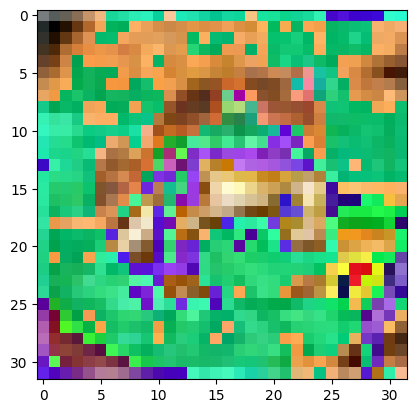

In [20]:
# TODO : EDA

sample = trainset[0]
img_tensor = sample[0]
image = (sample[0].permute(1,2,0).numpy()*255).astype('uint8')

print("Trainset length CIFAR10: ", len(trainset))
print("Testset length CIFAR10: ", len(testset))

plt.imshow(image)

Text(0, 0.5, 'Counts')

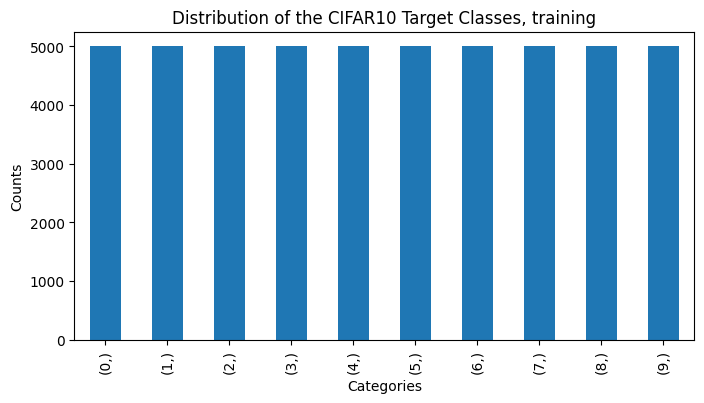

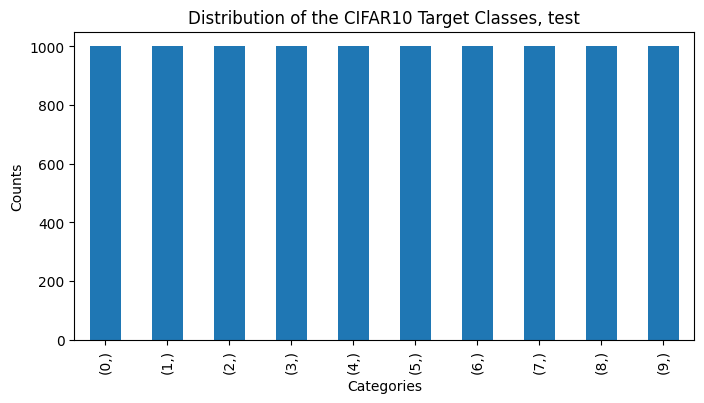

In [21]:
import pandas as pd

targets_trainig = pd.DataFrame(trainset.targets) 
targets_test = pd.DataFrame(testset.targets) 

counts_train = targets_trainig.value_counts()
counts_test = targets_test.value_counts()

plt.figure(figsize=(8, 4))
counts_train.plot(kind='bar')
plt.title("Distribution of the CIFAR10 Target Classes, training")
plt.xlabel('Categories')
plt.ylabel('Counts')


plt.figure(figsize=(8, 4))
counts_test.plot(kind='bar')
plt.title("Distribution of the CIFAR10 Target Classes, test")
plt.xlabel('Categories')
plt.ylabel('Counts')

In [4]:
# TODO : Create your DataModule

class CIFARDataModule(pl.LightningDataModule):

    def __init__(self):
        super().__init__()
        self.transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])
        self.data_dir = './data'
        self.batch_size_train, self.batch_size_valid, self.batch_size_test = 32, 32, 32

    def prepare_data(self):
        CIFAR10(self.data_dir, train=True, download=True)
        CIFAR10(self.data_dir, train=False, download=True)

    def setup(self, stage):
        if stage == "fit" or stage is None:
            cifar_dataset = CIFAR10(self.data_dir, train=True, transform=self.transform)
            train_size = int(0.8 * len(cifar_dataset))
            test_size = len(cifar_dataset) - train_size
          
            self.cifar_train, self.cifar_valid = torch.utils.data.random_split(cifar_dataset, [train_size, test_size])

        # Second stage is 'test' 
        if stage == "test" or stage is None:
            self.cifar_test = CIFAR10(self.data_dir, train=False, transform=self.transform)

    def train_dataloader(self):
        
        return DataLoader(self.cifar_train, batch_size=self.batch_size_train, shuffle=True)

    def val_dataloader(self):
        
        return DataLoader(self.cifar_valid, batch_size=self.batch_size_valid, shuffle=False)

    def test_dataloader(self):
        
        return DataLoader(self.cifar_test, batch_size=self.batch_size_test, shuffle=False)


### ii - Module

In [23]:
# TODO : Create your Module
class CIFARClassifier(pl.LightningModule):
    def __init__(self,in_channels = 3, output_shape = 10, learning_rate = 1e-3):
        super(CIFARClassifier,self).__init__()
        # what is the output_shape of your model ?
        self.output_shape = output_shape
        self.learning_rate = learning_rate
        self.index_test = 0
        self.acc = 0
        self.save_hyperparameters()
        # TODO : Define your model here, be careful, your model will be an instance of the class. Watch  out for the input data.
        self.model = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=3, stride=1,padding=1),  #32x32x3 -> 32x32x32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),                          #32x32x32 -> 16x16x32
            nn.Conv2d(32, 64, kernel_size=3, stride=1,padding = 1),         #16x16x32 -> 16x16x64
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),                          #16x16x64 -> 8x8x64
            nn.Flatten(),                                                    #8x8x64 -> 4096
            nn.Linear(4096, 128),                                           #4096 -> 128
            nn.ReLU(),
            nn.Linear(128, output_shape),                                              #128 -> 10
            nn.Softmax(dim=1)
        )

    def forward(self,x):
        x = self.model(x)
        return x

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(), lr= self.learning_rate)
        return optimizer

    def training_step(self, batch, batch_idx):
        images,labels = batch     
        prediction = self.forward(images)
        loss = F.cross_entropy(prediction, labels)
        acc = torchmetrics.functional.accuracy(prediction, labels,task='multiclass', num_classes=self.output_shape)
        self.log('train_acc', acc)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        images,labels = batch
        prediction = self.forward(images)
        loss = F.cross_entropy(prediction, labels)
        acc = torchmetrics.functional.accuracy(prediction, labels,task='multiclass', num_classes=self.output_shape)
        self.log('val_acc', acc)
        self.log('val_loss', loss)
        
    def test_step(self, batch, batch_idx):
        images,labels = batch
        prediction = self.forward(images)
        loss = F.cross_entropy(prediction, labels)
        self.index_test += 1
        self.acc += torchmetrics.functional.accuracy(prediction, labels,task='multiclass', num_classes=self.output_shape)
        self.log('test_loss', loss)
        self.log('test_acc', self.acc)

    def test_epoch_start(self):
        self.acc = 0
        self.index_test=0
            
    def on_test_epoch_end(self):
        self.acc = self.acc/self.index_test            
        self.log('Final Accuracy', self.acc)



### iii - Train

In [24]:
# TODO : Train
import tensorboard
tb_logger_cf = pl.loggers.TensorBoardLogger("CIFAR10_Training")

dm_cf = CIFARDataModule()
model_cf = CIFARClassifier(output_shape=10)

trainer_cf = pl.Trainer(max_epochs=15,accelerator='gpu',logger=tb_logger_cf,enable_checkpointing=True)
trainer_cf.fit(model_cf, dm_cf)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type       | Params
-------------------------------------
0 | model | Sequential | 545 K 
-------------------------------------
545 K     Trainable params
0         Non-trainable params
545 K     Total params
2.180     Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

/users/jorghern70/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/users/jorghern70/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 14: 100%|██████████| 1250/1250 [00:33<00:00, 37.70it/s, v_num=0]

`Trainer.fit` stopped: `max_epochs=15` reached.


Epoch 14: 100%|██████████| 1250/1250 [00:33<00:00, 37.68it/s, v_num=0]


### iv - Test

In [25]:
# TODO : Test

trainer_cf.test(model_cf, datamodule=dm_cf)

#Final test accuracy: 0.6743

Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/users/jorghern70/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 313/313 [00:04<00:00, 73.67it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Final Accuracy         0.6743210554122925
        test_acc            106.28199768066406
        test_loss           1.7848179340362549
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 1.7848179340362549,
  'test_acc': 106.28199768066406,
  'Final Accuracy': 0.6743210554122925}]


**Does your model perform well on the CIFAR Dataset ?**

No




## b - The OG Model : Finetuning a Model

If your model performed well on the CIFAR-10 Dataset, congrats. But let's achieve better results. Often, for industrial works, we pretrain a model on a large dataset (ImageNet or internal Dataset), and then fine-tune the model on a Dataset.

* **What's the intuition behind fine-tuning ?**


input -> [pretrained network]->head(10 outputs) ->prediction 

### i - Importing a Pretrained Model

We will import a ConvNext model. Why ? It's said to be a really good backbone that competes with the Transformer models. Let's load the model.
We are going to use TorchSummary to print what the size of the inputs and outputs are.

* What is the difference between a trainable and a non trainable parameter ?
    
* How many parameters does the model have ?
    50,223,688

In [5]:

import torchvision

model = torchvision.models.convnext_small(weights='DEFAULT')
# TODO : Using torchsummary, print a summary of the model
from torchsummary import summary
summary(model)


Layer (type:depth-idx)                        Param #
├─Sequential: 1-1                             --
|    └─Conv2dNormActivation: 2-1              --
|    |    └─Conv2d: 3-1                       4,704
|    |    └─LayerNorm2d: 3-2                  192
|    └─Sequential: 2-2                        --
|    |    └─CNBlock: 3-3                      79,296
|    |    └─CNBlock: 3-4                      79,296
|    |    └─CNBlock: 3-5                      79,296
|    └─Sequential: 2-3                        --
|    |    └─LayerNorm2d: 3-6                  192
|    |    └─Conv2d: 3-7                       73,920
|    └─Sequential: 2-4                        --
|    |    └─CNBlock: 3-8                      306,048
|    |    └─CNBlock: 3-9                      306,048
|    |    └─CNBlock: 3-10                     306,048
|    └─Sequential: 2-5                        --
|    |    └─LayerNorm2d: 3-11                 384
|    |    └─Conv2d: 3-12                      295,296
|    └─Sequential: 2-6

Layer (type:depth-idx)                        Param #
├─Sequential: 1-1                             --
|    └─Conv2dNormActivation: 2-1              --
|    |    └─Conv2d: 3-1                       4,704
|    |    └─LayerNorm2d: 3-2                  192
|    └─Sequential: 2-2                        --
|    |    └─CNBlock: 3-3                      79,296
|    |    └─CNBlock: 3-4                      79,296
|    |    └─CNBlock: 3-5                      79,296
|    └─Sequential: 2-3                        --
|    |    └─LayerNorm2d: 3-6                  192
|    |    └─Conv2d: 3-7                       73,920
|    └─Sequential: 2-4                        --
|    |    └─CNBlock: 3-8                      306,048
|    |    └─CNBlock: 3-9                      306,048
|    |    └─CNBlock: 3-10                     306,048
|    └─Sequential: 2-5                        --
|    |    └─LayerNorm2d: 3-11                 384
|    |    └─Conv2d: 3-12                      295,296
|    └─Sequential: 2-6

In [8]:
# TODO : Using torchsummary, send an image of the same size as a sample of CIFAR-10
#summary(model(image) ) # ... = input shape as a tuple (C,H,W)
from torchsummary import summary
import torch

# create a sample image with the same dimensions as CIFAR-10 images
image = torch.randn(1, 3, 32, 32)

# pass the image through the model using torchsummary
summary(model, image)

print(model)

Layer (type:depth-idx)                        Output Shape              Param #
├─Sequential: 1-1                             [-1, 768, 1, 1]           --
|    └─Conv2dNormActivation: 2-1              [-1, 96, 8, 8]            --
|    |    └─Conv2d: 3-1                       [-1, 96, 8, 8]            4,704
|    |    └─LayerNorm2d: 3-2                  [-1, 96, 8, 8]            192
|    └─Sequential: 2-2                        [-1, 96, 8, 8]            --
|    |    └─CNBlock: 3-3                      [-1, 96, 8, 8]            79,296
|    |    └─CNBlock: 3-4                      [-1, 96, 8, 8]            79,296
|    |    └─CNBlock: 3-5                      [-1, 96, 8, 8]            79,296
|    └─Sequential: 2-3                        [-1, 192, 4, 4]           --
|    |    └─LayerNorm2d: 3-6                  [-1, 96, 8, 8]            192
|    |    └─Conv2d: 3-7                       [-1, 192, 4, 4]           73,920
|    └─Sequential: 2-4                        [-1, 192, 4, 4]           --

* **What is the output size of the model ?** <br>
(batch size, 1000)
* **What will be the issue of using this model as is to perform classification on the CIFAR-10 Dataset ?**<br>

we'll get 1000 different outputs for the prediction of  1000 classes but our dataset has just 10 classes. Also the pre-trained network was trained on IMAGENET-1K which possibly it's not well-suited for the classes of the CIFAR-10. Training adjusted to the new dataset is needed


In [9]:
# TODO : According to your answer to the previous questions, perform the changes.
# You can access each layers using model.name_of_layer
new_model = torchvision.models.convnext_small(weights='DEFAULT').eval()
new_model.classifier[-1] = nn.Linear(768, 10)

#print(new_model)
image = torch.randn(1, 3, 32, 32)
summary(new_model, image)

Layer (type:depth-idx)                        Output Shape              Param #
├─Sequential: 1-1                             [-1, 768, 1, 1]           --
|    └─Conv2dNormActivation: 2-1              [-1, 96, 8, 8]            --
|    |    └─Conv2d: 3-1                       [-1, 96, 8, 8]            4,704
|    |    └─LayerNorm2d: 3-2                  [-1, 96, 8, 8]            192
|    └─Sequential: 2-2                        [-1, 96, 8, 8]            --
|    |    └─CNBlock: 3-3                      [-1, 96, 8, 8]            79,296
|    |    └─CNBlock: 3-4                      [-1, 96, 8, 8]            79,296
|    |    └─CNBlock: 3-5                      [-1, 96, 8, 8]            79,296
|    └─Sequential: 2-3                        [-1, 192, 4, 4]           --
|    |    └─LayerNorm2d: 3-6                  [-1, 96, 8, 8]            192
|    |    └─Conv2d: 3-7                       [-1, 192, 4, 4]           73,920
|    └─Sequential: 2-4                        [-1, 192, 4, 4]           --

Layer (type:depth-idx)                        Output Shape              Param #
├─Sequential: 1-1                             [-1, 768, 1, 1]           --
|    └─Conv2dNormActivation: 2-1              [-1, 96, 8, 8]            --
|    |    └─Conv2d: 3-1                       [-1, 96, 8, 8]            4,704
|    |    └─LayerNorm2d: 3-2                  [-1, 96, 8, 8]            192
|    └─Sequential: 2-2                        [-1, 96, 8, 8]            --
|    |    └─CNBlock: 3-3                      [-1, 96, 8, 8]            79,296
|    |    └─CNBlock: 3-4                      [-1, 96, 8, 8]            79,296
|    |    └─CNBlock: 3-5                      [-1, 96, 8, 8]            79,296
|    └─Sequential: 2-3                        [-1, 192, 4, 4]           --
|    |    └─LayerNorm2d: 3-6                  [-1, 96, 8, 8]            192
|    |    └─Conv2d: 3-7                       [-1, 192, 4, 4]           73,920
|    └─Sequential: 2-4                        [-1, 192, 4, 4]           --

### iii - Module



In [6]:
# TODO : Create your Module

# Careful : How should your learning rate be ? low to avoid lossing the already learned weigths of the pretrained network-> Typical values range from 1e-3 to 1e-4

class CIFARClassifier_tuned(pl.LightningModule):
    def __init__(self,in_channels = 3, output_shape = 10, learning_rate = 1e-5):
        super(CIFARClassifier_tuned,self).__init__()
        # what is the output_shape of your model ?
        self.output_shape = output_shape
        self.learning_rate = learning_rate
        self.index_test = 0
        self.acc = 0
        self.save_hyperparameters()
        # TODO : Define your model here, be careful, your model will be an instance of the class. Watch  out for the input data.
        self.backbone = torchvision.models.convnext_small(weights='DEFAULT').eval()
        self.backbone.classifier[-1] = nn.Linear(768, 10)
        
        self.model = nn.Sequential(
            self.backbone,
            nn.Softmax(dim=1)
        ) 

    def forward(self,x):
        output = self.model(x)
        return output
    
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(), lr= self.learning_rate)
        return optimizer

    def training_step(self, batch, batch_idx):
        images,labels = batch     
        prediction = self.forward(images)
        loss = F.cross_entropy(prediction, labels)
        acc = torchmetrics.functional.accuracy(prediction, labels,task='multiclass', num_classes=self.output_shape)
        self.log('train_acc', acc)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        images,labels = batch
        prediction = self.forward(images)
        loss = F.cross_entropy(prediction, labels)
        acc = torchmetrics.functional.accuracy(prediction, labels,task='multiclass', num_classes=self.output_shape)
        self.log('val_acc', acc)
        self.log('val_loss', loss)
        
    def test_step(self, batch, batch_idx):
        images,labels = batch
        prediction = self.forward(images)
        loss = F.cross_entropy(prediction, labels)
        self.index_test += 1
        self.acc += torchmetrics.functional.accuracy(prediction, labels,task='multiclass', num_classes=self.output_shape)
        self.log('test_loss', loss)
        self.log('test_acc', self.acc)

    def on_test_epoch_start(self):
        self.acc = 0
        self.index_test=0
            
    def on_test_epoch_end(self):
        self.acc = self.acc/self.index_test            
        self.log('Final Accuracy', self.acc)

### iv - Train

In [7]:
# TODO : Train
import tensorboard
tb_logger_cf = pl.loggers.TensorBoardLogger("CIFAR10_Training_Tuned_3")

dm_cf = CIFARDataModule()
model_cf = CIFARClassifier_tuned(output_shape=10)

trainer_cf = pl.Trainer(max_epochs=5,accelerator='gpu',logger=tb_logger_cf,enable_checkpointing=True)
trainer_cf.fit(model_cf, dm_cf)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | backbone | ConvNeXt   | 49.5 M
1 | model    | Sequential | 49.5 M
----------------------------------------
49.5 M    Trainable params
0         Non-trainable params
49.5 M    Total params
197.850   Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

/users/jorghern70/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/users/jorghern70/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 4: 100%|██████████| 1250/1250 [02:32<00:00,  8.21it/s, v_num=1]

/users/jorghern70/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/call.py:53: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


### v - Test

In [8]:
# TODO : Test
trainer_cf.test(model_cf, datamodule=dm_cf)

Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/users/jorghern70/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 313/313 [00:09<00:00, 32.99it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Final Accuracy         0.9009584784507751
        test_acc            141.08340454101562
        test_loss           1.5597758293151855
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 1.5597758293151855,
  'test_acc': 141.08340454101562,
  'Final Accuracy': 0.9009584784507751}]


* **What is your final accuracy ?**<br>
0.90
* **Is Fine Tuning a model better than creating your own model ?** <br>
According to the obtained results so far, it seems Fine Tuning is better than training our own model. However, better architectures may achieve better resuls and thus, more experimentation and reading the literature may be needed to conclude